In [29]:
# 📦 Data manipulation
import pandas as pd
import numpy as np 

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
data =  pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data Exploration

#### intial look at the data set

In [31]:
data.head()             # See the first 5 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [32]:
data.tail()             # See the last 5 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [33]:
data.shape              # (rows, columns)

(5110, 12)

In [34]:
data.columns            # Column names

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [35]:
data.info()             # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [36]:
data[data['smoking_status'] == 'Unknown']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [37]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

####  Descriptive Statistics

In [38]:
data.describe(include='all')   # Summary for numeric and categorical data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [39]:
data['gender'].value_counts() # Target distribution

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [40]:
data['stroke'].value_counts()  # Target distribution

stroke
0    4861
1     249
Name: count, dtype: int64

In [41]:
data['stroke'].value_counts(normalize=True) * 100  # Percentage

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

#### Missing Values

In [42]:
data.isnull().sum()                     # Count of missing values per column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [43]:
data.isnull().mean().sort_values()     # Percentage of missing values

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
bmi                  0.039335
dtype: float64

<Axes: >

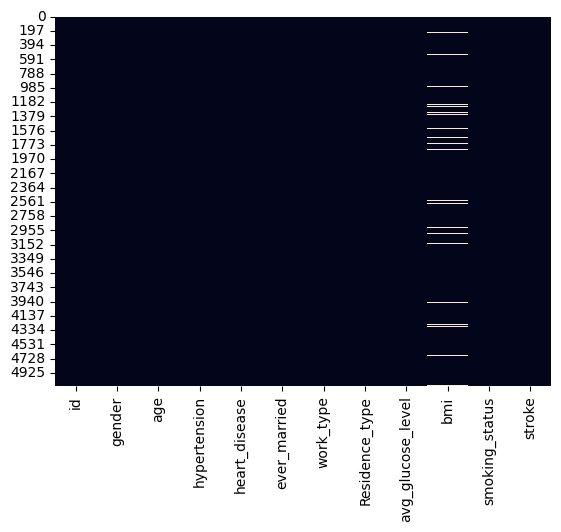

In [44]:
sns.heatmap(data.isnull(), cbar=False) # Visualize missing values

In [45]:
data[data['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


#### Check outliers 

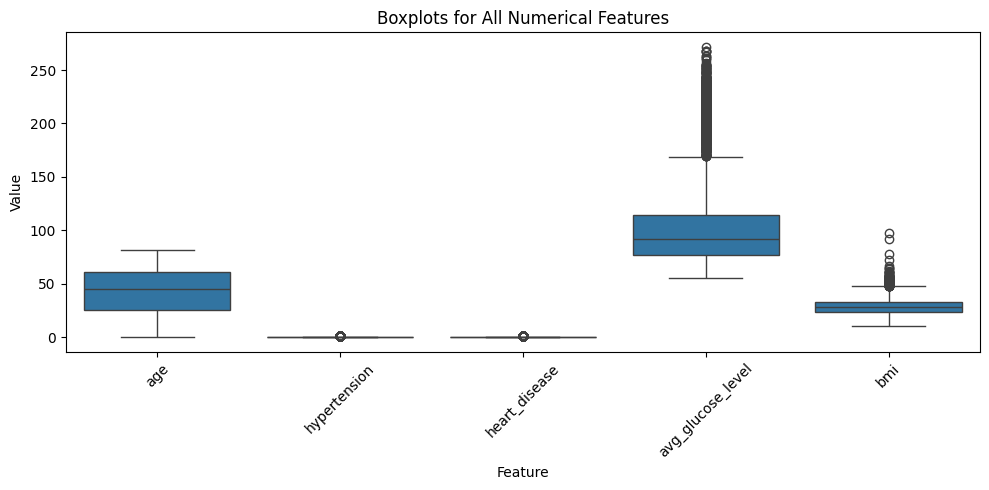

In [46]:
# Drop 'stroke' and 'id' from the DataFrame first
numeric_data = data.drop(['stroke', 'id'], axis=1).select_dtypes(include='number')

# Now get the column names (Index of numeric features)
numeric_features = numeric_data.columns



# Melt the DataFrame to long format
melted_data = numeric_data.melt(var_name="Feature", value_name="Value")

# Set figure size
plt.figure(figsize=(10, 5))

# Create boxplots for each feature
sns.boxplot(x="Feature", y="Value", data=melted_data)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)
plt.title("Boxplots for All Numerical Features")
plt.tight_layout()
plt.show()

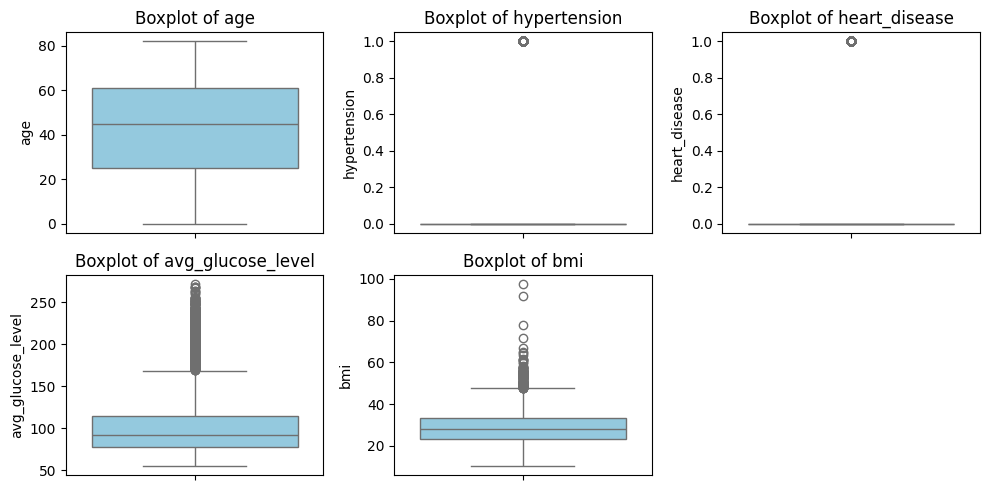

In [47]:
# Drop 'stroke' and 'id' from the DataFrame first
numeric_data = data.drop(['stroke', 'id'], axis=1).select_dtypes(include='number')

# Now get the column names (Index of numeric features)
numeric_features = numeric_data.columns
# Set up the plot size
plt.figure(figsize=(10, 5))

# Loop through features and plot boxplots
for i, col in enumerate(numeric_features, 1):
    plt.subplot((len(numeric_features) + 2) // 3, 3, i)  # auto grid layout
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

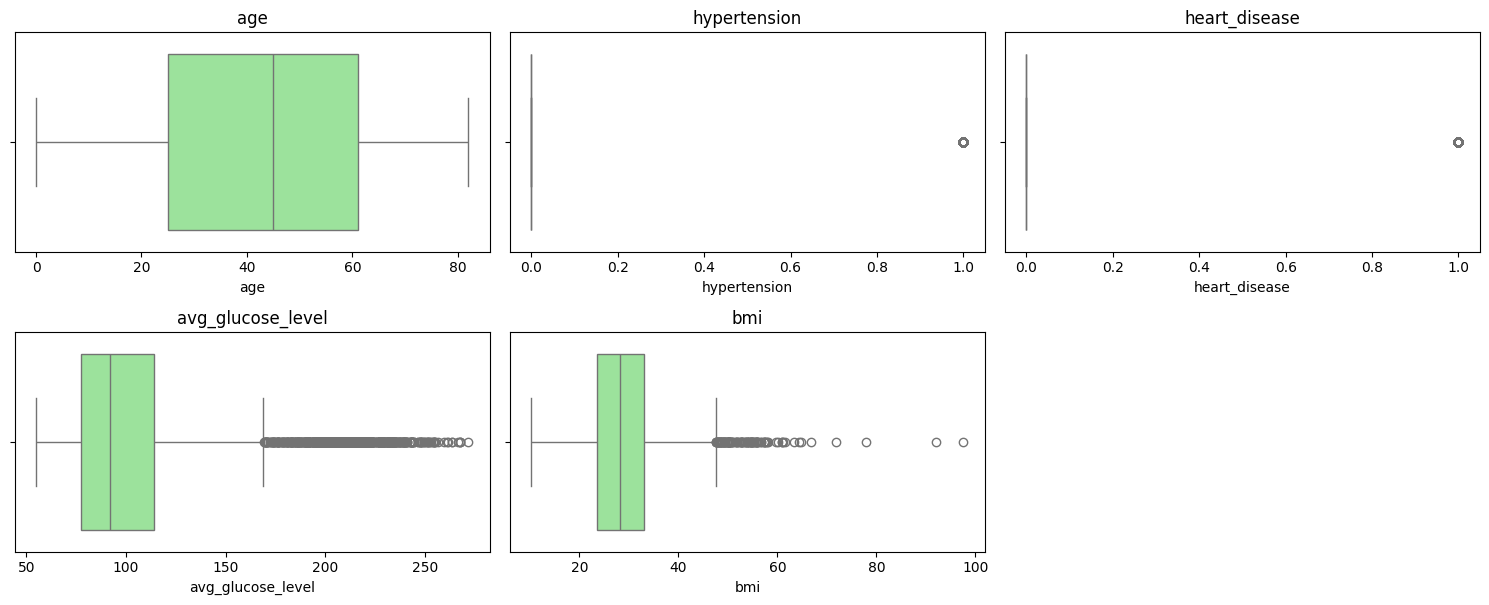

In [48]:
# Drop 'stroke' and 'id' from the DataFrame first
numeric_data = data.drop(['stroke', 'id'], axis=1).select_dtypes(include='number')

# Now get the column names (Index of numeric features)
numeric_features = numeric_data.columns

# Set up the figure
num_features = len(numeric_data)
cols = 3  # Number of plots per row
rows = (num_features + cols - 1) // cols  # Ceiling division

plt.figure(figsize=(5 * cols, 3 * rows))

# Plot each feature horizontally
for i, col in enumerate(numeric_data, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=data[col], color='lightgreen', orient='h')
    plt.title(f'{col}', fontsize=12)
    plt.tight_layout()

plt.show()

####  Data Types and Unique Values

In [49]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [50]:
data.nunique()    # Number of unique values in each column

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

#### Categorical Feature Distribution

In [51]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col}:\n", data[col].value_counts())



gender:
 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married:
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type:
 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type:
 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status:
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


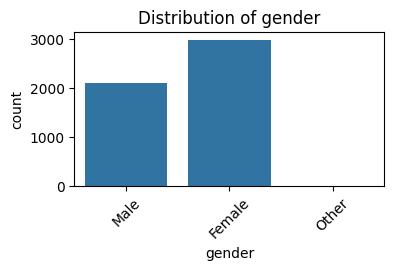

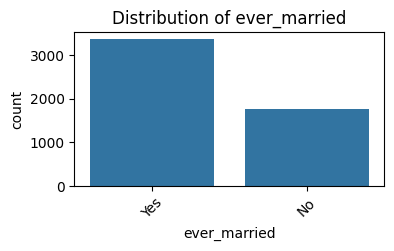

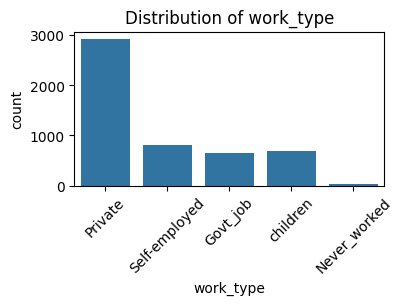

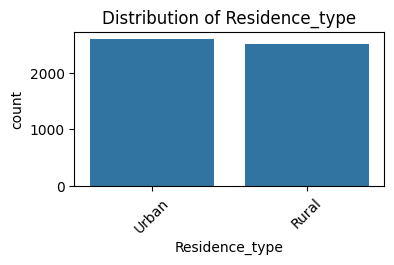

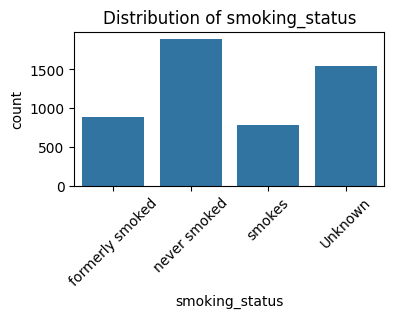

In [52]:
for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()
    


#### Numeric Feature Distribution

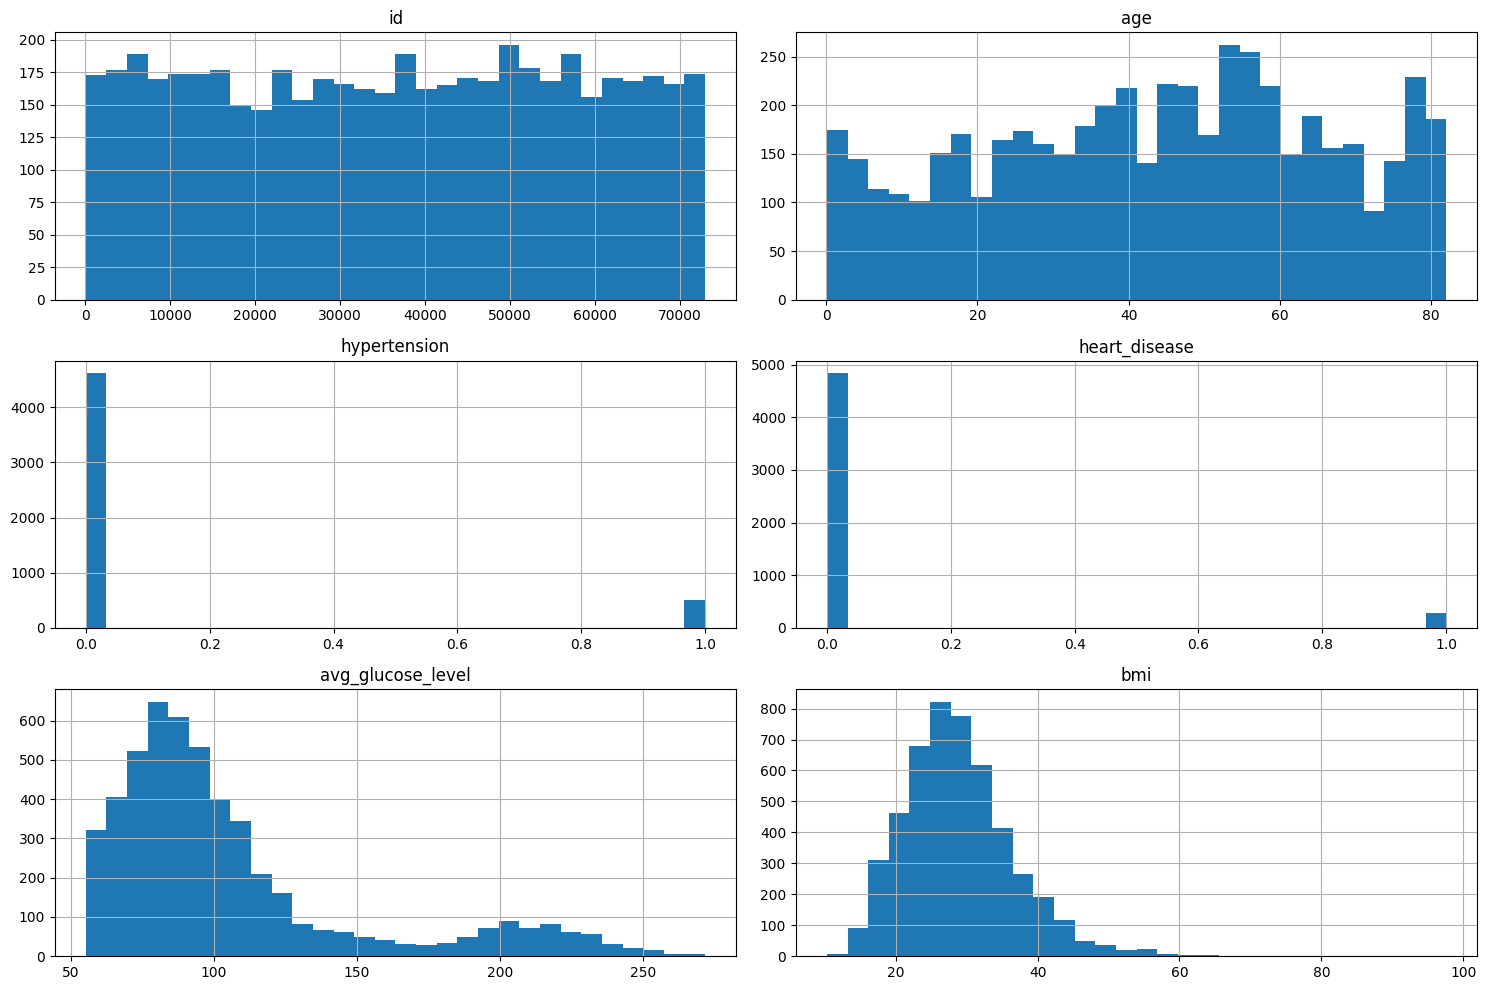

In [53]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('stroke')
data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

#### Correlation Heatmap

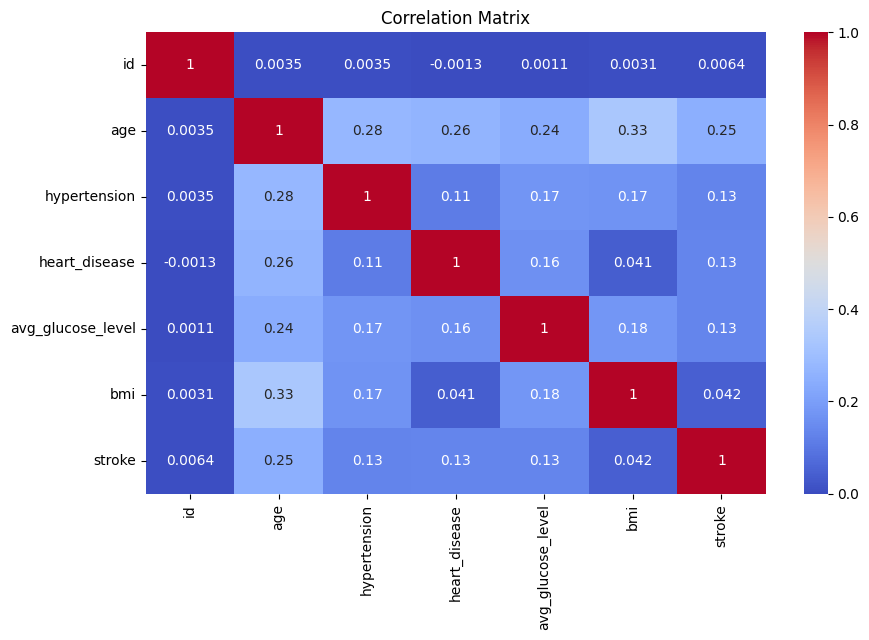

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


<Axes: >

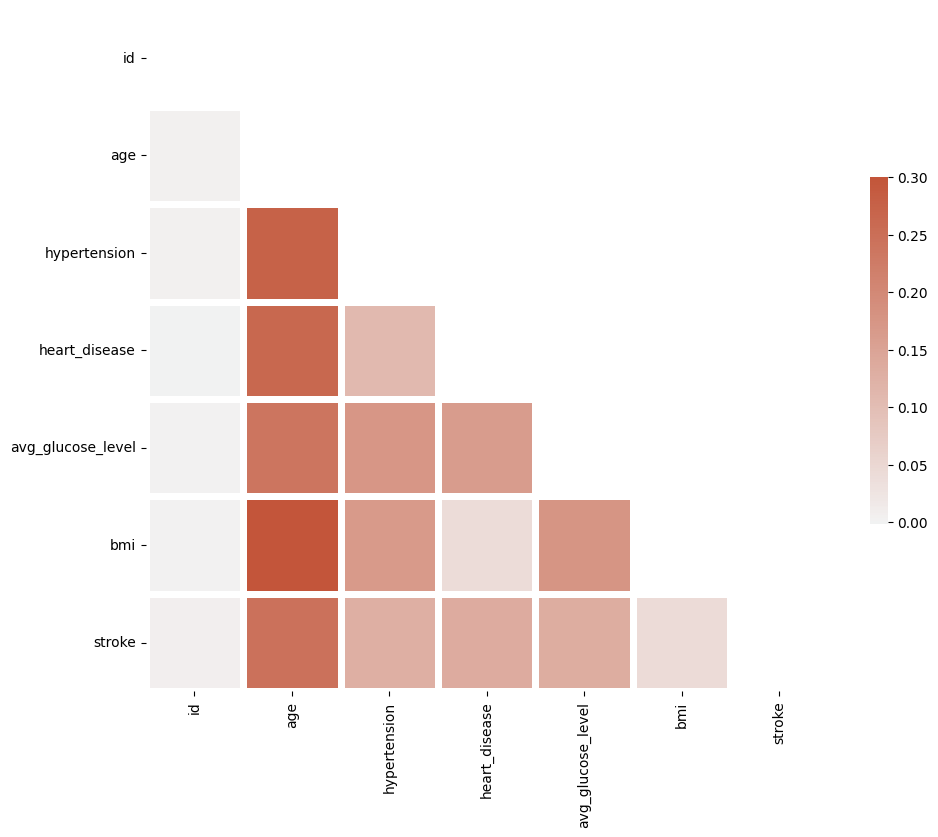

In [55]:
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr , dtype=bool))
f , ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": .5} )


#### Stroke vs Features

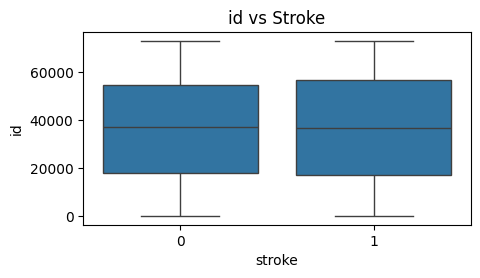

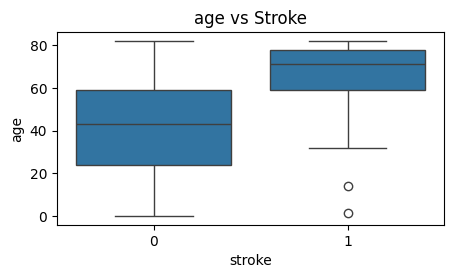

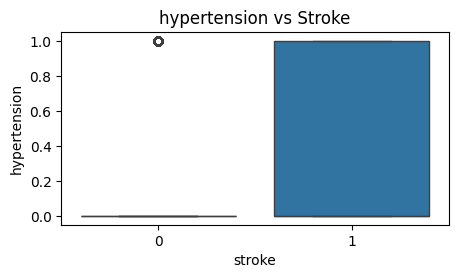

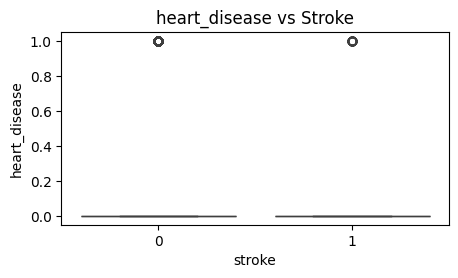

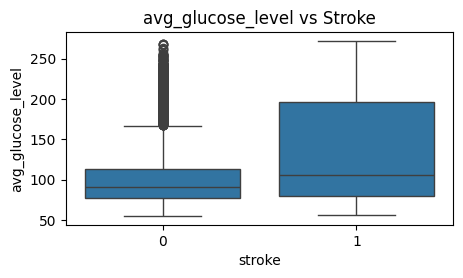

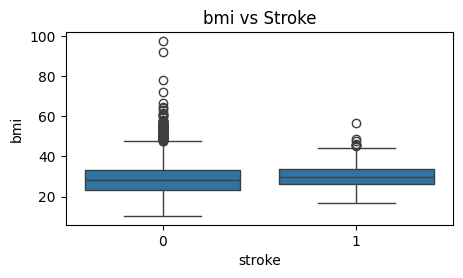

In [56]:
for col in numeric_cols:
    plt.figure(figsize=(5, 2.5))
    sns.boxplot(x='stroke', y=col, data=data)
    plt.title(f"{col} vs Stroke")
    plt.show()
